In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/traffic_dataset_.csv")
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
8677,id2748052,2,2016-02-05 16:36:49,2016-02-05 16:42:05,1,-73.963936,40.761101,-73.945808,40.717476,N,316
8678,id0211369,1,2016-01-16 17:47:51,2016-01-16 17:53:40,1,-73.971901,40.762848,-73.958008,40.773800,N,349
8679,id0681154,1,2016-04-07 22:40:44,2016-04-07 22:50:04,2,-73.988029,40.728077,-73.994820,40.743729,N,560
8680,id3657409,2,2016-03-25 14:00:00,2016-03-25 14:09:17,3,-73.897774,40.754326,-73.930573,40.771191,N,557


In [2]:
df=df.drop(['id','vendor_id'],axis=1)

In [3]:
df.dtypes

pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [5]:
df['pickup_datetime'].dt.year.value_counts()

2016    8682
Name: pickup_datetime, dtype: int64

In [6]:
df['dropoff_datetime'].dt.year.value_counts()

2016    8682
Name: dropoff_datetime, dtype: int64

In [7]:
df['pickup_day']=df['pickup_datetime'].dt.day.astype(int)
df['pickup_hour']=df['pickup_datetime'].dt.hour.astype(int)
df['pickup_month']=df['pickup_datetime'].dt.month.astype(int)

In [8]:
df['dropoff_day']=df['dropoff_datetime'].dt.day.astype(int)
df['dropoff_hour']=df['dropoff_datetime'].dt.hour.astype(int)
df['dropoff_month']=df['dropoff_datetime'].dt.month.astype(int)

In [9]:
df=df.drop(['dropoff_datetime',"pickup_datetime"],axis=1)

In [10]:
df

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_hour,pickup_month,dropoff_day,dropoff_hour,dropoff_month
0,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,17,3,14,17,3
1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,0,6,12,0,6
2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,11,1,19,12,1
3,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,19,4,6,19,4
4,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,13,3,26,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,1,-73.963936,40.761101,-73.945808,40.717476,N,316,5,16,2,5,16,2
8678,1,-73.971901,40.762848,-73.958008,40.773800,N,349,16,17,1,16,17,1
8679,2,-73.988029,40.728077,-73.994820,40.743729,N,560,7,22,4,7,22,4
8680,3,-73.897774,40.754326,-73.930573,40.771191,N,557,25,14,3,25,14,3


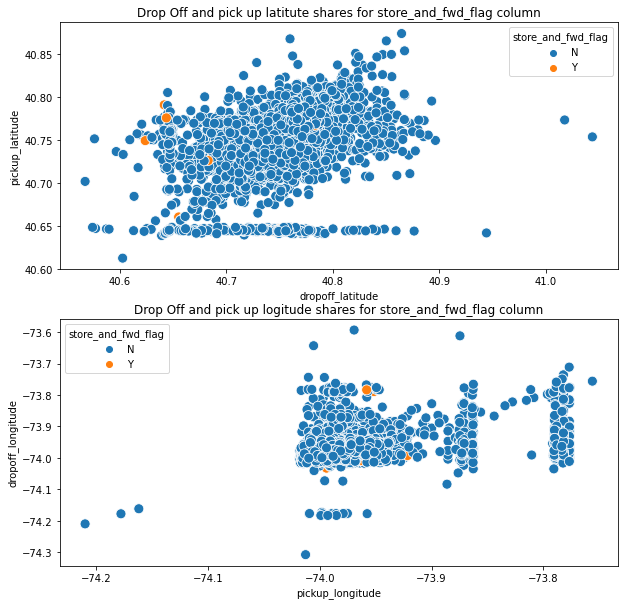

In [11]:
#We use seaborn libary, scatterplot to see the location of certain data. So we are plotting subplots.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig,ax=plt.subplots(2,1,figsize=(10,10))
ax[0].set_title("Drop Off and pick up latitute shares for store_and_fwd_flag column")
sns.scatterplot(ax=ax[0],data=df,x='dropoff_latitude',y="pickup_latitude",hue="store_and_fwd_flag",s=100)
ax[1].set_title("Drop Off and pick up logitude shares for store_and_fwd_flag column")
sns.scatterplot(ax=ax[1],data=df,x="pickup_longitude",y="dropoff_longitude",hue="store_and_fwd_flag",s=100)
plt.show()

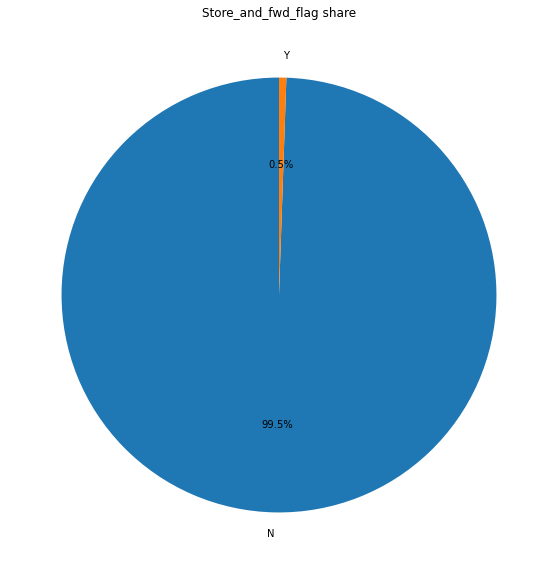

In [12]:
value_counts = df['store_and_fwd_flag'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Store_and_fwd_flag share")
plt.show()

In [13]:
df.corrwith(df['trip_duration']).abs().sort_values(ascending=False)

trip_duration        1.000000
pickup_longitude     0.062715
pickup_latitude      0.040728
passenger_count      0.035340
dropoff_latitude     0.034031
dropoff_longitude    0.031700
pickup_month         0.024317
dropoff_month        0.024317
pickup_day           0.008719
dropoff_day          0.004542
dropoff_hour         0.003852
pickup_hour          0.003065
dtype: float64

[]

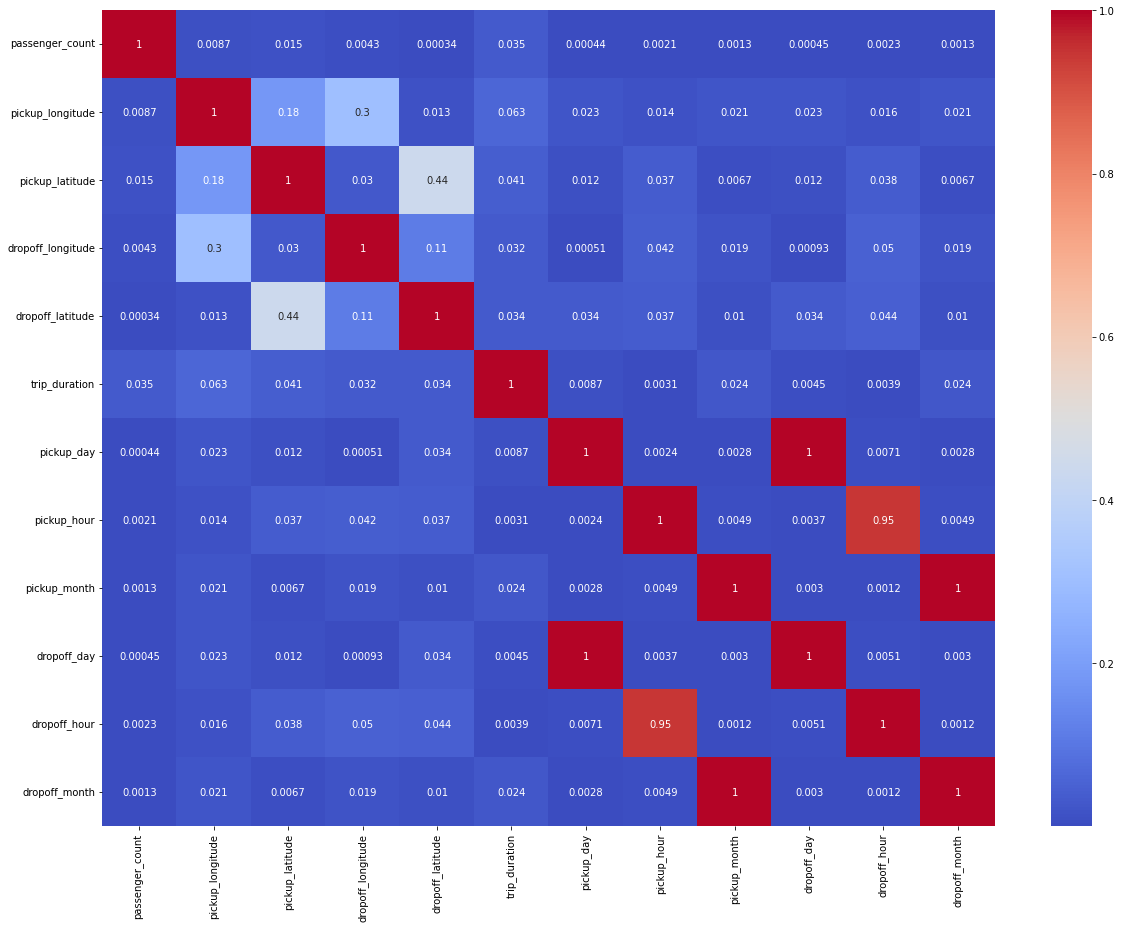

In [14]:
corrm=df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(corrm, cmap="coolwarm", annot=True)
plt.plot()

In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['store_and_fwd_flag']=lb.fit_transform(df['store_and_fwd_flag'])

In [16]:
X=df.drop('trip_duration',axis=1)
Y=df['trip_duration'].copy()

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X 

array([[-0.50740116, -0.23413298,  0.60409335, ..., -0.18079884,
         0.51085857, -0.30902672],
       [-0.50740116, -0.18946047, -0.43735019, ..., -0.41336356,
        -2.1128334 ,  1.46230028],
       [-0.50740116, -0.15380083,  0.46234883, ...,  0.40061295,
        -0.26081554, -1.48991138],
       ...,
       [ 0.25251895, -0.38500068, -0.80915906, ..., -0.99477535,
         1.28253268,  0.28141561],
       [ 1.01243906,  1.93287574,  0.12151276, ...,  1.0983071 ,
         0.04785411, -0.30902672],
       [-0.50740116, -0.94379895, -1.4399763 , ...,  1.56343653,
         0.81952821,  1.46230028]])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [20]:
from sklearn.linear_model import LogisticRegression
LgR_model=LogisticRegression(max_iter=2000)
LgR_model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

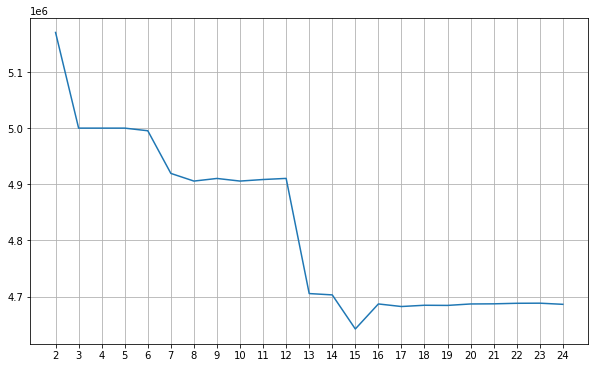

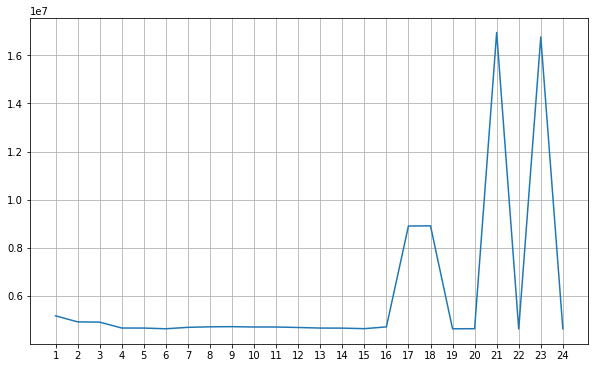

In [21]:
from sklearn import metrics,tree
f1 = []
for k in range(2,25):
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(2,25),f1)
plt.xticks(range(2,25))
plt.grid()
plt.show()

f1 = []
for k in range(1,25):
    dt = tree.DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    f1.append(metrics.mean_squared_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [31]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier(max_leaf_nodes=15,max_depth=16)
DT_model = DT_model.fit(x_train, y_train)

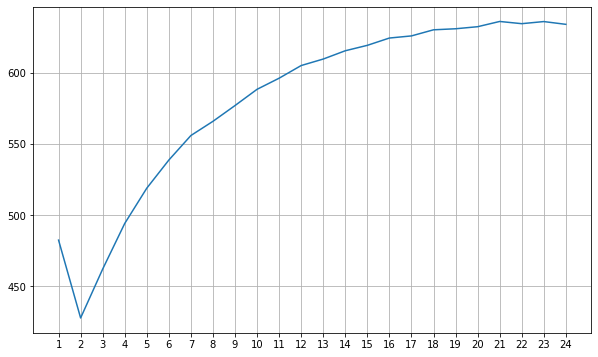

In [32]:
from sklearn.neighbors import KNeighborsClassifier
f1 = []
for k in range(1,25):
    knn_model =KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_predict = knn_model.predict(x_test)
    f1.append(metrics.mean_absolute_error(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [39]:
knn_model =KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [40]:
def evaluation(model):
  score = model.score(x_test, y_test)
  y_predicted=model.predict(x_test)
  mse=metrics.mean_squared_error(y_test,y_predicted)
  mae=metrics.mean_absolute_error(y_test,y_predicted)
  print("Mean Squared error: ", mse)
  print("Mean Absolute error: ", mae)

In [41]:
evaluation(knn_model) 

Mean Squared error:  4568561.9890616005
Mean Absolute error:  427.853195164076


In [42]:
evaluation(LgR_model)

Mean Squared error:  4591857.621761658
Mean Absolute error:  456.8756476683938


In [43]:
evaluation(DT_model)

Mean Squared error:  4684508.268278642
Mean Absolute error:  493.2861255037421


In [44]:
from joblib import dump
dump(DT_model, 'model.joblib')

['model.joblib']